In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from ast import literal_eval

pd.set_option('display.max_columns', 100)
sns.set_palette("light:#5A9")

In [2]:
# Getting song info with Artist name, Album name
song_info = pd.read_csv('../input/19000-spotify-songs/song_info.csv')

In [3]:
song_info.head()

,song_name,artist_name,album_names,playlist
0,Boulevard of Broken Dreams,Green Day,Greatest Hits: God's Favorite Band,00s Rock Anthems
1,In The End,Linkin Park,Hybrid Theory,00s Rock Anthems
2,Seven Nation Army,The White Stripes,Elephant,00s Rock Anthems
3,By The Way,Red Hot Chili Peppers,By The Way (Deluxe Version),00s Rock Anthems
4,How You Remind Me,Nickelback,Silver Side Up,00s Rock Anthems


In [4]:
# Getting song data
song_data = pd.read_csv('../input/19000-spotify-songs/song_data.csv')

In [5]:
song_data.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [6]:
# Showing the fact that there are duplicates
song_data[song_data["song_name"]=="Boulevard of Broken Dreams"]

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.00552,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
10689,Boulevard of Broken Dreams,71,261266,0.00394,0.490,0.679,0.000015,8,0.0383,-3.680,1,0.0309,167.046,4,0.506


In [7]:
# Droping duplicates in data and info
song_data.drop_duplicates(subset="song_name", keep="first", inplace=True)
song_info.drop_duplicates(subset="song_name", keep="first", inplace=True)

In [8]:
# Joining song info and song data
data = song_data.merge(song_info, on='song_name', how='left')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13070 entries, 0 to 13069
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         13070 non-null  object 
 1   song_popularity   13070 non-null  int64  
 2   song_duration_ms  13070 non-null  int64  
 3   acousticness      13070 non-null  float64
 4   danceability      13070 non-null  float64
 5   energy            13070 non-null  float64
 6   instrumentalness  13070 non-null  float64
 7   key               13070 non-null  int64  
 8   liveness          13070 non-null  float64
 9   loudness          13070 non-null  float64
 10  audio_mode        13070 non-null  int64  
 11  speechiness       13070 non-null  float64
 12  tempo             13070 non-null  float64
 13  time_signature    13070 non-null  int64  
 14  audio_valence     13070 non-null  float64
 15  artist_name       13070 non-null  object 
 16  album_names       13070 non-null  object

In [10]:
data.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,13070.000000,1.307000e+04,13070.000000,13070.000000,13070.000000,13070.000000,13070.000000,13070.000000,13070.000000,13070.000000,13070.000000,13070.000000,13070.000000,13070.000000
mean,48.487682,2.186274e+05,0.277770,0.625010,0.635722,0.096672,5.319510,0.180517,-7.790448,0.632976,0.100839,121.151915,3.951568,0.528564
std,20.108158,6.345056e+04,0.301784,0.159125,0.223985,0.246570,3.583933,0.145377,4.110762,0.482011,0.105197,29.105418,0.319291,0.248652
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.011900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37.000000,1.829672e+05,0.025000,0.524250,0.490000,0.000000,2.000000,0.093300,-9.537250,0.000000,0.037300,98.069500,4.000000,0.334000
50%,51.000000,2.114860e+05,0.147000,0.637000,0.667000,0.000022,5.000000,0.121000,-6.859500,1.000000,0.054400,120.025000,4.000000,0.529000
75%,63.000000,2.445060e+05,0.479750,0.741000,0.815000,0.005910,8.000000,0.223000,-5.041250,1.000000,0.115000,139.955750,4.000000,0.730000
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


In [11]:
# Getting the stats by artist_name
data_gb_artist = data.groupby(['artist_name']).size().reset_index().sort_values([0], ascending=False)
data_gb_artist.columns = ['artist_name', 'count']

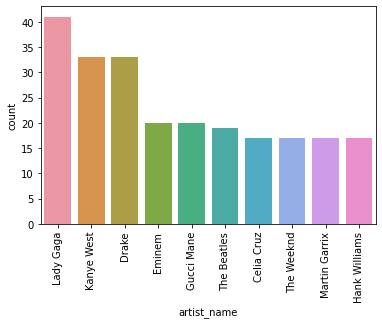

In [12]:
# Printing the most active artists
sns.barplot(x="artist_name", y="count", data=data_gb_artist.head(10))
p = plt.xticks(rotation=90)

In [13]:
# Top popular songs
data.sort_values(['song_popularity'], ascending=False).head(10)

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,artist_name,album_names,playlist
3618,Happier,100,214289,0.19100,0.687,0.792,0.000000,5,0.1670,-2.749,1,0.0452,100.015,4,0.671,Marshmello,Happier,Certified Gold
1096,I Love It (& Lil Pump),99,127946,0.01140,0.901,0.522,0.000000,2,0.2590,-8.304,1,0.3300,104.053,4,0.329,Kanye West,I Love It,A1 Hip-Hop
3632,Promises (with Sam Smith),98,213309,0.01190,0.781,0.768,0.000005,11,0.3250,-5.991,1,0.0394,123.070,4,0.486,Calvin Harris,Promises (with Sam Smith),Certified Gold
3619,Eastside (with Halsey & Khalid),98,173799,0.55500,0.560,0.680,0.000000,6,0.1160,-7.648,0,0.3210,89.391,4,0.319,benny blanco,Eastside (with Halsey & Khalid),Certified Gold
61,"Taki Taki (with Selena Gomez, Ozuna & Cardi B)",98,212500,0.15300,0.841,0.798,0.000003,1,0.0618,-4.206,0,0.2290,95.948,4,0.591,DJ Snake,"Taki Taki (with Selena Gomez, Ozuna & Cardi B)",100% LatinX
1116,SICKO MODE,97,312820,0.00513,0.834,0.730,0.000000,8,0.1240,-3.714,1,0.2220,155.008,4,0.446,Travis Scott,ASTROWORLD,A1 Hip-Hop
6287,In My Mind,97,184560,0.17600,0.694,0.770,0.000011,6,0.1180,-5.335,1,0.1490,125.905,4,0.163,Dynoro,In My Mind,Global Top 50
1097,Falling Down,97,196400,0.01750,0.669,0.574,0.002940,4,0.1460,-6.442,0,0.0286,120.013,4,0.273,Lil Peep,Falling Down,A1 Hip-Hop
1124,FEFE (feat. Nicki Minaj & Murda Beatz),96,179404,0.08800,0.931,0.387,0.000000,1,0.1360,-9.127,1,0.4120,125.978,4,0.376,6ix9ine,FEFE (feat. Nicki Minaj & Murda Beatz),A1 Hip-Hop
2899,SAD!,96,166605,0.25800,0.740,0.613,0.003720,8,0.1230,-4.880,1,0.1450,75.023,4,0.473,XXXTENTACION,?,Beats & Rhymes


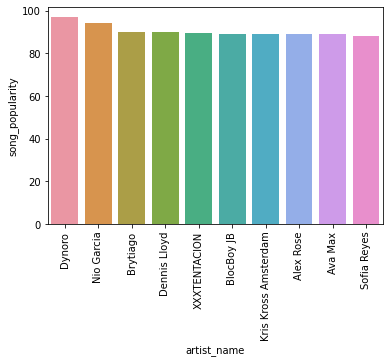

In [14]:
# Getting and printing average popularity by artists
data_gb_artist_avg_pop = data.groupby(['artist_name'])['song_popularity'].mean().to_frame().sort_values(['song_popularity'], ascending=False).reset_index()
sns.barplot(x="artist_name", y="song_popularity", data=data_gb_artist_avg_pop.head(10))
p = plt.xticks(rotation=90)

In [15]:
# Next : aving a 2D graph with
# width = popularity
# x = number of songs
# y = number of albums